In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_new=df.copy()

In [7]:
df_new.drop(['Id','Species'],axis=1,inplace=True)

In [8]:
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Finding optimum value of K with the help of Elbow Method**

In [10]:
from sklearn.cluster import KMeans

In [11]:
sse=[]
for i in range(1,11):
    k_model1=KMeans(n_clusters=i)
    k_model1.fit(df_new.iloc[:,:-1])
    sse.append(k_model1.inertia_)

In [12]:
sse

[594.0446666666667,
 133.45714841470533,
 69.50013924466339,
 49.50821558441559,
 40.39566666666667,
 32.909320128824476,
 29.087761554065906,
 25.41242851721971,
 23.324188561438564,
 21.519002848029167]

Text(0.5, 1.0, 'The Elbow Method')

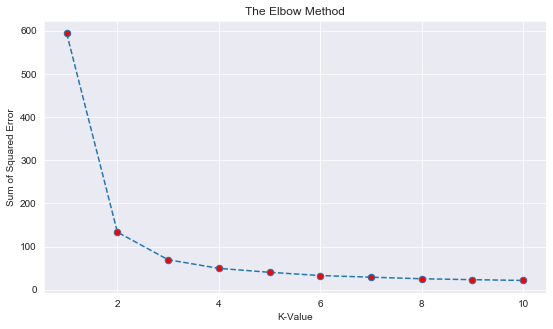

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
plt.plot(range(1,11),sse,marker='.',markersize=13,markerfacecolor='r',ls='--')
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Error')
plt.title('The Elbow Method')

**With the help of the above method i.e. elbow method, we could see that K=3 is a more suitable value to proceed further.**

In [14]:
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
k_model2=KMeans(n_clusters=3,random_state=0)
pred_1=k_model2.fit_predict(df_new)

In [24]:
pred_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [25]:
df_new['Cluster']=pred_1

In [26]:
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


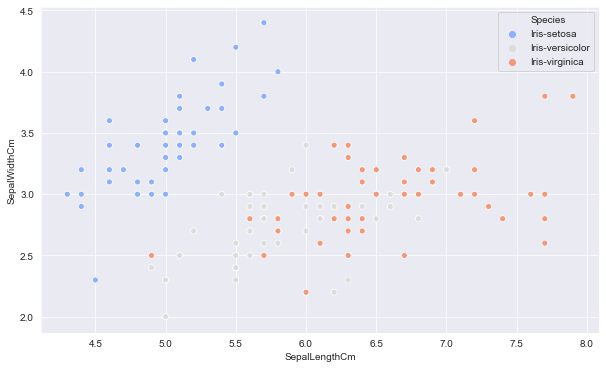

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',palette='coolwarm')

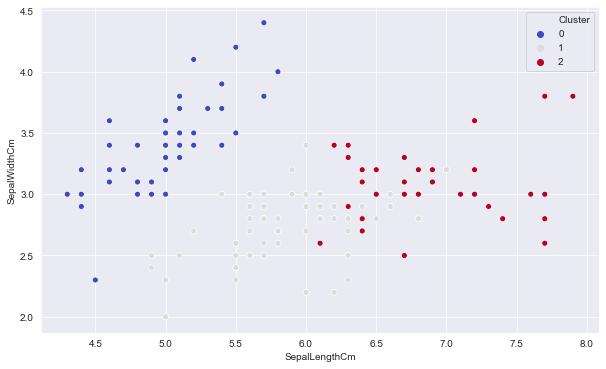

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df_new,hue='Cluster',palette='coolwarm')

In [29]:
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


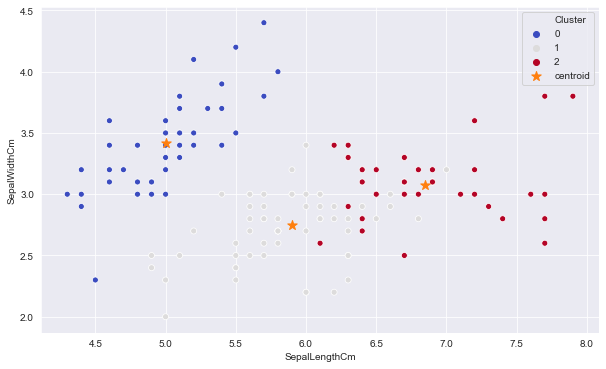

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df_new,hue='Cluster',palette='coolwarm')

#Centroid of the clusters
plt.scatter(k_model2.cluster_centers_[:,0],k_model2.cluster_centers_[:,1],marker='*',s=100,label='centroid')
plt.legend()

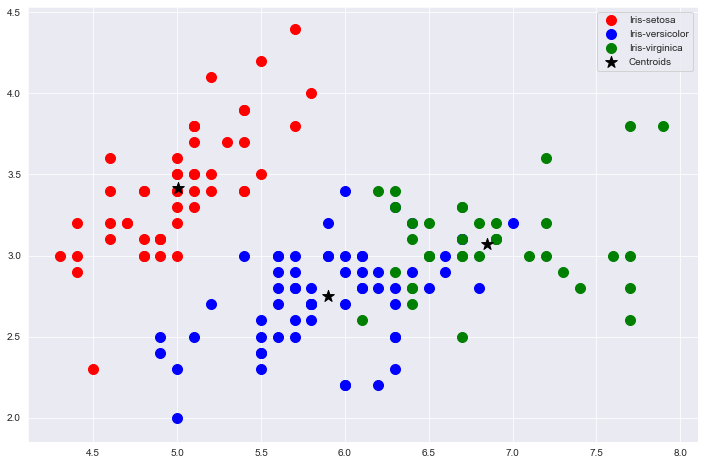

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(df_new[df_new['Cluster'] == 0].iloc[:,0], df_new[df_new['Cluster'] == 0].iloc[:,1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df_new[df_new['Cluster'] == 1].iloc[:,0], df_new[df_new['Cluster'] == 1].iloc[:,1], 
            s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(df_new[df_new['Cluster'] == 2].iloc[:,0], df_new[df_new['Cluster'] == 2].iloc[:,1], 
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_model2.cluster_centers_[:, 0], k_model2.cluster_centers_[:,1],marker='*',
            s = 150, c = 'black', label = 'Centroids')

plt.legend()